In [118]:
import pandas as pd
import numpy as np
import spacy as nlp
import matplotlib.pyplot as plt
import seaborn as sns


In [119]:
#import dataframe from csv using the ID column as index
games = pd.read_csv('../../project/assignment1/games.csv', index_col=0)
games


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [120]:
#different random EDA meassures
games_shape = games.shape
print(games_shape)
games_info = games.info()
print(games_info)

(1512, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB
None


In [121]:
print(games.isnull().sum())
#how do we deal with the null datapoints? 1 in team and summary and quite a few in Rating
nan_rating = games[games['Rating'].isnull()]
nan_rating

Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0,1,103,529


In [122]:
#furthermore we have 'releases on tbd' in the Release Date column

release_tbd = games[games['Release Date'] == 'releases on TBD']
release_tbd

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
644,Deltarune,releases on TBD,['tobyfox'],4.3,313,313,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']","UNDERTALE's parallel story, DELTARUNE. Meet ne...","['Spamton is so hot, I want to kiss him in the...",1.3K,83,468,617
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
1252,Elden Ring: Shadow of the Erdtree,releases on TBD,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18,18,"['Adventure', 'RPG']",An expansion to Elden Ring setting players on ...,['I really loved that they integrated Family G...,1,0,39,146


In [123]:
#min max of plays
max_rating = games['Rating'].max()
min_rating = games['Rating'].min()
print(max_rating)
print(min_rating)

4.8
0.7


In [124]:
games.describe()

,Rating
count,1499.000000
mean,3.719346
std,0.532608
min,0.700000
25%,3.400000
50%,3.800000
75%,4.100000
max,4.800000


In [125]:
games['Rating'].describe()

count    1499.000000
mean        3.719346
std         0.532608
min         0.700000
25%         3.400000
50%         3.800000
75%         4.100000
max         4.800000
Name: Rating, dtype: float64

<Axes: >

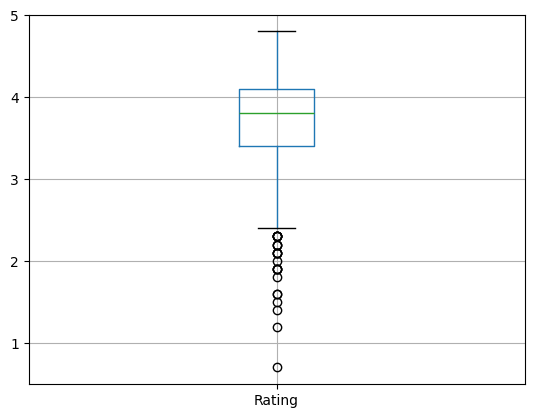

In [126]:
#boxplot of the ratings
#with pandas
games.boxplot(column='Rating')

In [127]:
#games by year
#release date is an object right now, we need to transfer it into a number
games['Release Date'] = pd.to_datetime(games['Release Date'], errors='coerce')
games['Release Date'].isnull().sum()


3

In [128]:
games
games.loc[649,:]

Title                       Death Stranding 2
Release Date                              NaT
Team                   ['Kojima Productions']
Rating                                    NaN
Times Listed                              105
Number of Reviews                         105
Genres               ['Adventure', 'Shooter']
Summary                                   NaN
Reviews                                    []
Plays                                       3
Playing                                     0
Backlogs                                  209
Wishlist                                  644
Name: 649, dtype: object

<Axes: title={'center': 'Games per day since 1980'}, xlabel='Release Date', ylabel='number of games'>

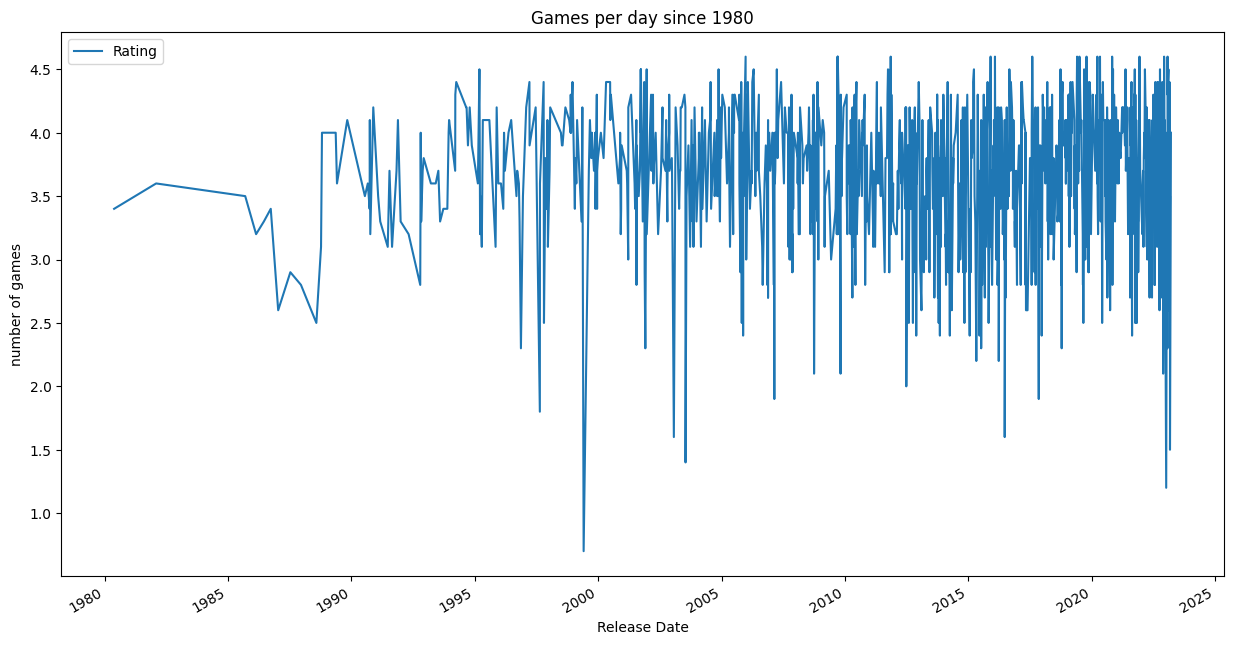

In [138]:
#games per year list?
games['Release Date'].groupby

#plotting the whole thing into a linechart
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('year')
ax1.set_ylabel('number of games')
ax1.set_title("Games per day since 1980")

games.plot(x='Release Date', kind='line', ax=ax1)


In [141]:
#i wanna look at all of the games that are RPGs so how do I call them from the Genre column and extract the relevant data to a new dataframe?
rpg_games = games[games['Genres'].apply(lambda genres: 'RPG' in genres)]
rpg_games


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
6,Omori,2020-12-25,"['OMOCAT', 'PLAYISM']",4.2,1.6K,1.6K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A turn-based surreal horror RPG in which a chi...,"[""The best game I've played in my life"", ""omor...",7.2K,1.1K,4.5K,3.8K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,Lisa the Joyful,2015-08-24,['Dingaling'],3.7,126,126,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",Traverse the world as Buddy. Stake your claim ...,"[""This is essentially just a dungeon crawler a...",1K,7,358,233
1489,Kingdoms of Amalur: Reckoning,2012-02-07,"['38 Studios', 'Electronic Arts']",3.2,99,99,"['Brawler', 'RPG']","Kingdoms of Amalur: Reckoning is an epic, open...","[""As the first RPG that introduced me to the g...",1.2K,22,365,106
1500,Children of Morta,2019-09-03,"['Dead Mage', '11 bit studios']",3.4,153,153,"['Adventure', 'Indie', 'RPG']",Children of Morta is a narrative driven hack a...,"[""It's a reasonably solid rogue-lite RPG. The ...",727,54,385,136
1509,Dragon's Dogma,2012-05-22,['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206


<Axes: >

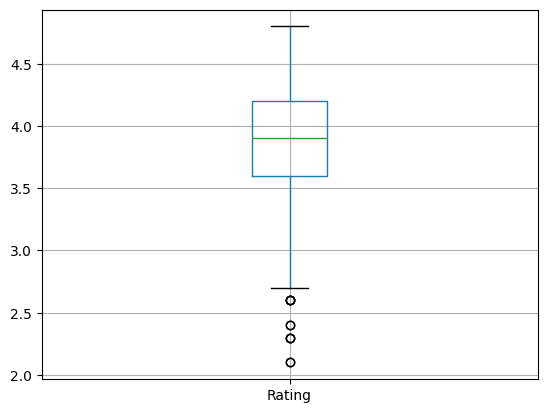

In [143]:
rpg_games['Rating'].describe()
rpg_games.boxplot(column='Rating')

In [147]:
#indie games vs big publisher games
indie_games = games[games['Genres'].apply(lambda genres: 'Indie' in genres)]
indie_games
publisher_games = games[games['Genres'].apply(lambda genres: 'Indie' not in genres)]
publisher_games

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
5,Minecraft,2011-11-18,['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,1.8K,1.1K,230
7,Metroid Dread,2021-10-07,"['Nintendo', 'MercurySteam']",4.3,2.1K,2.1K,"['Adventure', 'Platform']",Join intergalactic bounty hunter Samus Aran in...,['Have only been a Metroid fan for couple of y...,9.2K,759,3.4K,3.3K
9,NieR: Automata,2017-02-23,"['PlatinumGames', 'Square Enix']",4.3,2.9K,2.9K,"['Brawler', 'RPG']","NieR: Automata tells the story of androids 2B,...","['Holy shit', 'im carrying the weight of the w...",18K,1.1K,6.2K,3.6K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,2010-12-22,['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,2019-05-21,"['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,2012-05-22,['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,Baldur's Gate 3,2020-10-06,['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602
